# Tech Fest 1.0 AI Hackathon Task 01

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style='whitegrid')
sns.set_palette('viridis')
plt.rcParams['axes.titleweight'] = 'bold'
warnings.filterwarnings('ignore')

## Training Data

In [3]:
train = pd.read_csv('../data/train.csv')

In [4]:
train.head()

,Date_Time,Sex,Nation,Job,Freelance_Status,Genetic_Background,Therapy,Indoor_Days,Increasing_Stress,Habit_Changes,Psychological_History,Emotional_Fluctuations,Adaptation_Challenges,Job_Engagement,Social_Vulnerability,Psych_Evaluation,Support_Options,Body_Weight
0,8/27/2014 13:47,Male,United States,Business,No,No,No,15-30 days,Maybe,Maybe,No,Medium,Yes,Maybe,Yes,No,Yes,59.0
1,8/29/2014 14:31,Male,United States,Student,Yes,Yes,Yes,1-14 days,Maybe,Yes,No,High,No,Yes,Maybe,No,Not sure,58.0
2,8/27/2014 11:34,Male,US,Others,NaN,No,Yes,More than 2 months,No,No,No,High,No,Yes,No,No,Yes,70.0
3,8/28/2014 22:22,Male,United States,Housewife,No,No,Yes,15-30 days,Maybe,No,No,Low,Yes,Maybe,Yes,No,No,72.0
4,8/27/2014 14:53,Male,United States,Housewife,No,No,Yes,Go out Every day,Yes,Yes,No,Low,Yes,No,No,No,Yes,94.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277746 entries, 0 to 277745
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date_Time               277746 non-null  object 
 1   Sex                     277746 non-null  object 
 2   Nation                  277745 non-null  object 
 3   Job                     277746 non-null  object 
 4   Freelance_Status        272781 non-null  object 
 5   Genetic_Background      277746 non-null  object 
 6   Therapy                 277745 non-null  object 
 7   Indoor_Days             277743 non-null  object 
 8   Increasing_Stress       277746 non-null  object 
 9   Habit_Changes           277746 non-null  object 
 10  Psychological_History   277744 non-null  object 
 11  Emotional_Fluctuations  277746 non-null  object 
 12  Adaptation_Challenges   277745 non-null  object 
 13  Job_Engagement          277742 non-null  object 
 14  Social_Vulnerability

In [6]:
duplicated = train.duplicated().sum()
null_count = train.isnull().sum()

print(f"Duplicated Sum: {duplicated}\n{'-'*30}")
print(f"Null Count:\n{'-'*30}\n{null_count}")

Duplicated Sum: 44
------------------------------
Null Count:
------------------------------
Date_Time                    0
Sex                          0
Nation                       1
Job                          0
Freelance_Status          4965
Genetic_Background           0
Therapy                      1
Indoor_Days                  3
Increasing_Stress            0
Habit_Changes                0
Psychological_History        2
Emotional_Fluctuations       0
Adaptation_Challenges        1
Job_Engagement               4
Social_Vulnerability         0
Psych_Evaluation             2
Support_Options              4
Body_Weight                  1
dtype: int64


## Testing Data

In [7]:
test = pd.read_csv('../data/test.csv')

In [8]:
test.head()

,ID,Date_Time,Sex,Nation,Job,Freelance_Status,Genetic_Background,Therapy,Indoor_Days,Increasing_Stress,Habit_Changes,Psychological_History,Adaptation_Challenges,Job_Engagement,Social_Vulnerability,Psych_Evaluation,Support_Options,Body_Weight
0,1,8/27/2014 13:31,Female,Canada,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,Yes,74
1,2,8/27/2014 14:13,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,Yes,71
2,3,8/27/2014 16:25,Female,United States,Corporate,Yes,Yes,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,No,64
3,4,8/27/2014 16:42,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,Yes,58
4,5,8/29/2014 21:40,Female,Canada,Corporate,Yes,Yes,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,Yes,89


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14618 entries, 0 to 14617
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     14618 non-null  int64 
 1   Date_Time              14618 non-null  object
 2   Sex                    14618 non-null  object
 3   Nation                 14618 non-null  object
 4   Job                    14618 non-null  object
 5   Freelance_Status       14381 non-null  object
 6   Genetic_Background     14618 non-null  object
 7   Therapy                14618 non-null  object
 8   Indoor_Days            14618 non-null  object
 9   Increasing_Stress      14618 non-null  object
 10  Habit_Changes          14618 non-null  object
 11  Psychological_History  14618 non-null  object
 12  Adaptation_Challenges  14618 non-null  object
 13  Job_Engagement         14618 non-null  object
 14  Social_Vulnerability   14618 non-null  object
 15  Psych_Evaluation   

In [10]:
duplicated = test.duplicated().sum()
null_count = test.isnull().sum()

print(f"Duplicated Sum: {duplicated}\n{'-'*30}")
print(f"Null Count:\n{'-'*30}\n{null_count}")

Duplicated Sum: 0
------------------------------
Null Count:
------------------------------
ID                         0
Date_Time                  0
Sex                        0
Nation                     0
Job                        0
Freelance_Status         237
Genetic_Background         0
Therapy                    0
Indoor_Days                0
Increasing_Stress          0
Habit_Changes              0
Psychological_History      0
Adaptation_Challenges      0
Job_Engagement             0
Social_Vulnerability       0
Psych_Evaluation           0
Support_Options            0
Body_Weight                0
dtype: int64


## DataFrame Utility Functions

In [11]:
def annotate_percentages(ax, column):
    total = len(column)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

## Feature Engineering

#### 1. ID & Date Time 

In [12]:
train.drop(columns=['Date_Time'], inplace=True)

In [13]:
test.drop(columns=['ID', 'Date_Time'], inplace=True)

#### 2. Sex

In [14]:
print(f"Null Count: {train['Sex'].isnull().sum()}")

Null Count: 0


In [15]:
sex_count = train['Sex'].value_counts()
sex_count

Sex
Male      227858
Female     49888
Name: count, dtype: int64

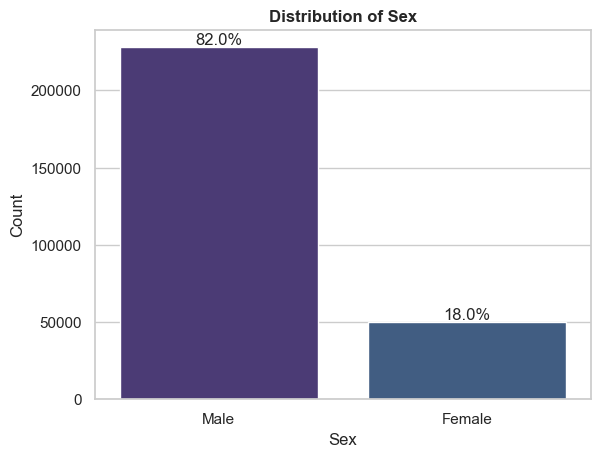

In [16]:
ax = sns.countplot(x='Sex', data=train, order=sex_count.index)

annotate_percentages(ax, train['Sex'])
plt.title('Distribution of Sex')
plt.ylabel('Count')
plt.show()

#### 3. Nation 

In [17]:
print(f"Null Count: {train['Nation'].isnull().sum()}")

Null Count: 1


In [18]:
null_index = train['Nation'][train['Nation'].isnull()]
null_index

207195    NaN
Name: Nation, dtype: object

In [19]:
most_frequent = train['Nation'].mode()[0]

train['Nation'].fillna(most_frequent, inplace=True)

In [20]:
print(f"Null Count: {train['Nation'].isnull().sum()}")

Null Count: 0


In [21]:
replacement_dict = {
    'US': 'United States', 'USA': 'United States', 'Usa': 'United States', 'us': 'United States', 
    'usa': 'United States', 'United States of America': 'United States', 'UK': 'United Kingdom', 
    'Uk': 'United Kingdom', 'England': 'United Kingdom'
}

train['Nation'].replace(replacement_dict, inplace=True)

In [22]:
nation_count = train['Nation'].value_counts()
nation_count

Nation
United States             162826
United Kingdom             48784
Canada                     17785
Australia                   5718
Netherlands                 5594
Ireland                     5275
Germany                     4456
Sweden                      2676
India                       2633
Brazil                      2223
France                      2211
South Africa                1894
New Zealand                 1888
Switzerland                 1486
Israel                      1483
Italy                       1478
Belgium                      780
Poland                       777
Greece                       748
Singapore                    746
Russia                       744
Denmark                      740
Thailand                     380
Portugal                     373
Croatia                      372
Philippines                  371
Colombia                     371
Moldova                      371
Mexico                       370
Georgia                      370
Fin

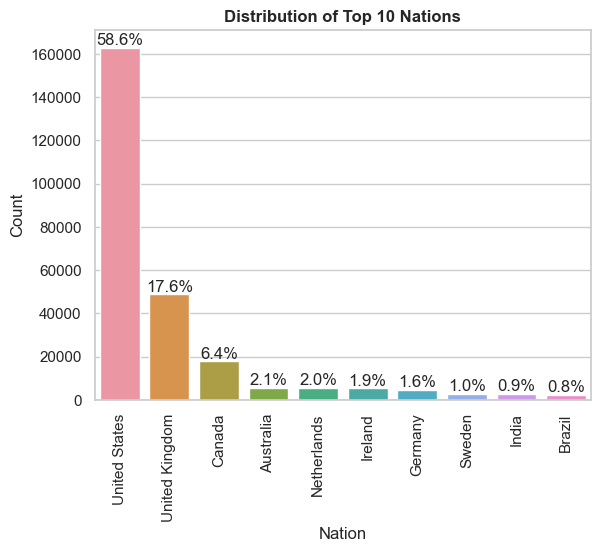

In [23]:
ax = sns.countplot(x='Nation', data=train, order=nation_count.nlargest(10).index)

annotate_percentages(ax, train['Nation'])
plt.title('Distribution of Top 10 Nations')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### 4. Job

In [24]:
print(f"Null Count: {train['Job'].isnull().sum()}")

Null Count: 0


In [25]:
job_count = train['Job'].value_counts()
job_count

Job
Housewife      62985
Student        58757
Corporate      58150
Others         50199
Business       47652
Not Defined        3
Name: count, dtype: int64

In [26]:
train['Job'].replace('Not Defined', job_count.index[0], inplace=True)

In [27]:
job_count = train['Job'].value_counts()
job_count

Job
Housewife    62988
Student      58757
Corporate    58150
Others       50199
Business     47652
Name: count, dtype: int64

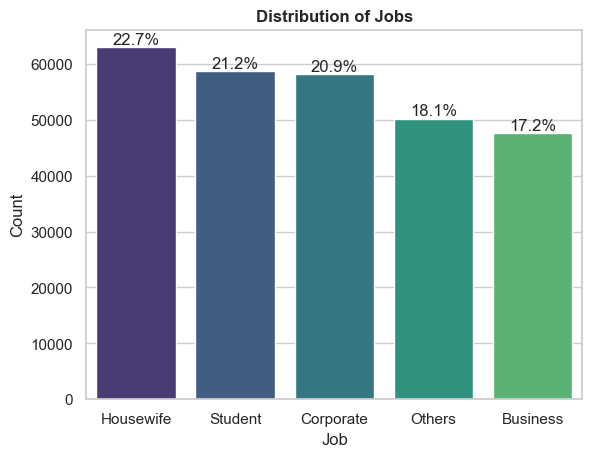

In [28]:
ax = sns.countplot(x='Job', data=train, order=job_count.index)

annotate_percentages(ax, train['Job'])
plt.title('Distribution of Jobs')
plt.ylabel('Count')
plt.show()

#### 5. Freelance Status

In [29]:
print(f"Train Null Count: {train['Freelance_Status'].isnull().sum()}")
print(f"Test Null Count: {test['Freelance_Status'].isnull().sum()}")

Train Null Count: 4965
Test Null Count: 237


In [30]:
most_frequent = train['Freelance_Status'].mode()[0]

train['Freelance_Status'].fillna(most_frequent, inplace=True)
test['Freelance_Status'].fillna(most_frequent, inplace=True)

In [31]:
print(f"Train Null Count: {train['Freelance_Status'].isnull().sum()}")
print(f"Test Null Count: {test['Freelance_Status'].isnull().sum()}")

Train Null Count: 0
Test Null Count: 0


In [32]:
replacement_dict = {'YES': 'Yes', 'no': 'No', 'NiLL': 'No'}

train['Freelance_Status'].replace(replacement_dict, inplace=True)

In [33]:
freelance_count = train['Freelance_Status'].value_counts()
freelance_count

Freelance_Status
No     250045
Yes     27701
Name: count, dtype: int64

In [34]:
test['Freelance_Status'].value_counts()

Freelance_Status
No     13151
Yes     1467
Name: count, dtype: int64

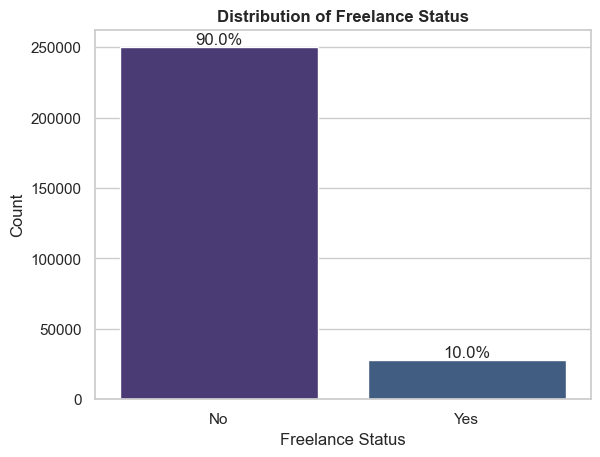

In [35]:
ax = sns.countplot(x='Freelance_Status', data=train, order=freelance_count.index)

annotate_percentages(ax, train['Freelance_Status'])
plt.title('Distribution of Freelance Status')
plt.xlabel('Freelance Status')
plt.ylabel('Count')
plt.show()

#### 6. Genetic Background

In [36]:
print(f"Null Count: {train['Genetic_Background'].isnull().sum()}")

Null Count: 0


In [37]:
replacement_dict = {'NILL': 'No', 'NO': 'No', 'Null': 'No', 'YEs': 'Yes', 'YES': 'Yes'}

train['Genetic_Background'].replace(replacement_dict, inplace=True)

In [38]:
genetic_background_count = train['Genetic_Background'].value_counts()
genetic_background_count

Genetic_Background
No     167966
Yes    109780
Name: count, dtype: int64

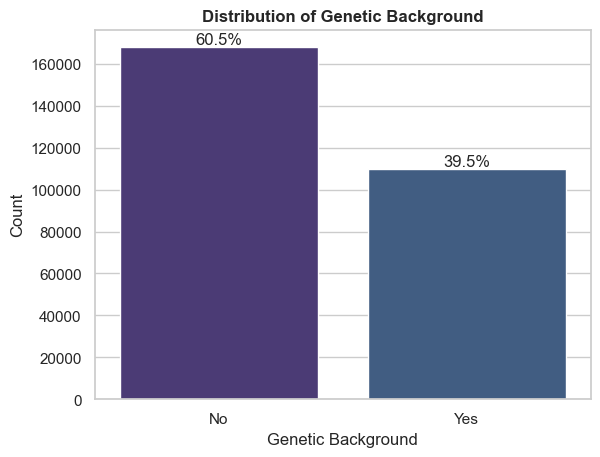

In [39]:
ax = sns.countplot(x='Genetic_Background', data=train, order=genetic_background_count.index)

annotate_percentages(ax, train['Genetic_Background'])
plt.title('Distribution of Genetic Background')
plt.xlabel('Genetic Background')
plt.ylabel('Count')
plt.show()

#### 7. Therapy

In [40]:
print(f"Null Count: {train['Therapy'].isnull().sum()}")

Null Count: 1


In [41]:
most_frequent = train['Therapy'].mode()[0]

train['Therapy'].fillna(most_frequent, inplace=True)

In [42]:
print(f"Null Count: {train['Therapy'].isnull().sum()}")

Null Count: 0


In [43]:
replacement_dict = {'NO': 'No', 'YES': 'Yes'}

train['Therapy'].replace(replacement_dict, inplace=True)

In [44]:
therapy_count = train['Therapy'].value_counts()
therapy_count

Therapy
Yes    140242
No     137504
Name: count, dtype: int64

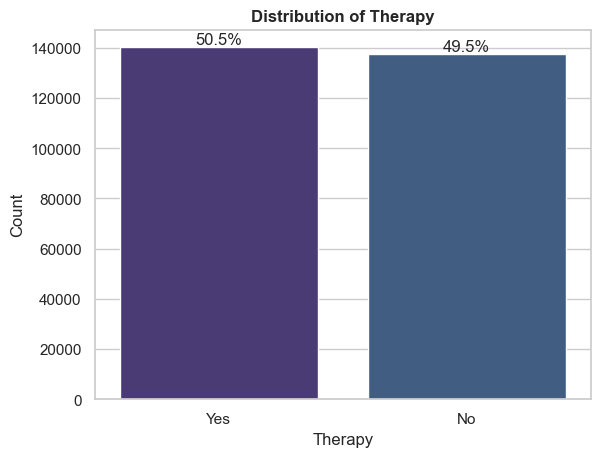

In [45]:
ax = sns.countplot(x='Therapy', data=train, order=therapy_count.index)

annotate_percentages(ax, train['Therapy'])
plt.title('Distribution of Therapy')
plt.ylabel('Count')
plt.show()

#### 8. Indoor Days  

In [46]:
print(f"Null Count: {train['Indoor_Days'].isnull().sum()}")

Null Count: 3


In [47]:
most_frequent = train['Indoor_Days'].mode()[0]

train['Indoor_Days'].fillna(most_frequent, inplace=True)

In [48]:
print(f"Null Count: {train['Indoor_Days'].isnull().sum()}")

Null Count: 0


In [49]:
replacement_dict = {'Go out Every Day': 'Go out Every day'}

train['Indoor_Days'].replace(replacement_dict, inplace=True)

In [50]:
indoor_count = train['Indoor_Days'].value_counts()
indoor_count

Indoor_Days
1-14 days             60421
31-60 days            57664
Go out Every day      55403
More than 2 months    53110
15-30 days            51148
Name: count, dtype: int64

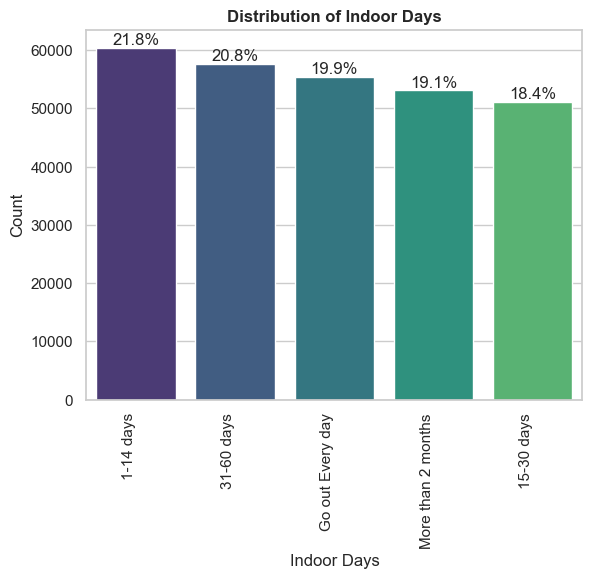

In [51]:
ax = sns.countplot(x='Indoor_Days', data=train, order=indoor_count.index)

annotate_percentages(ax, train['Indoor_Days'])
plt.title('Distribution of Indoor Days')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Indoor Days')
plt.ylabel('Count')
plt.show()

#### 9. Increasing Stress

In [52]:
print(f"Null Count: {train['Increasing_Stress'].isnull().sum()}")

Null Count: 0


In [53]:
stress_count = train['Increasing_Stress'].value_counts()
stress_count

Increasing_Stress
Maybe    95088
Yes      94622
No       88036
Name: count, dtype: int64

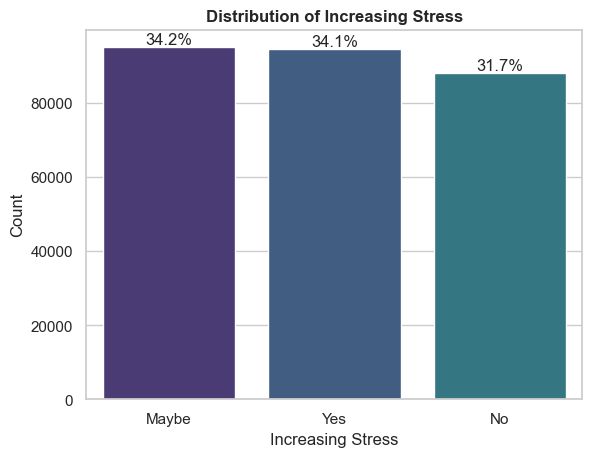

In [54]:
ax = sns.countplot(x='Increasing_Stress', data=train, order=stress_count.index)

annotate_percentages(ax, train['Increasing_Stress'])
plt.title('Distribution of Increasing Stress')
plt.xlabel('Increasing Stress')
plt.ylabel('Count')
plt.show()

#### 10. Habit Changes

In [55]:
print(f"Null Count: {train['Habit_Changes'].isnull().sum()}")

Null Count: 0


In [56]:
replacement_dict = {'YES': 'Yes'}

train['Habit_Changes'].replace(replacement_dict, inplace=True)

In [57]:
habit_count = train['Habit_Changes'].value_counts()
habit_count

Habit_Changes
Yes      104111
Maybe     90371
No        83264
Name: count, dtype: int64

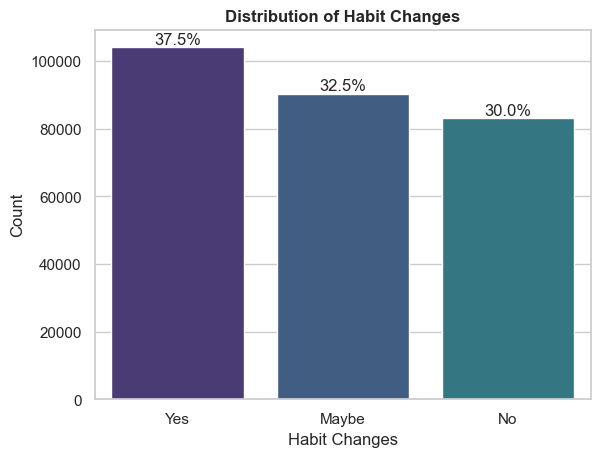

In [58]:
ax = sns.countplot(x='Habit_Changes', data=train, order=habit_count.index)

annotate_percentages(ax, train['Habit_Changes'])
plt.title('Distribution of Habit Changes')
plt.xlabel('Habit Changes')
plt.ylabel('Count')
plt.show()

#### 11. Psychological History

In [59]:
print(f"Null Count: {train['Psychological_History'].isnull().sum()}")

Null Count: 2


In [60]:
most_frequent = train['Psychological_History'].mode()[0]

train['Psychological_History'].fillna(most_frequent, inplace=True)

In [61]:
print(f"Null Count: {train['Psychological_History'].isnull().sum()}")

Null Count: 0


In [62]:
psychological_count = train['Psychological_History'].value_counts()
psychological_count

Psychological_History
No       98885
Maybe    90511
Yes      88350
Name: count, dtype: int64

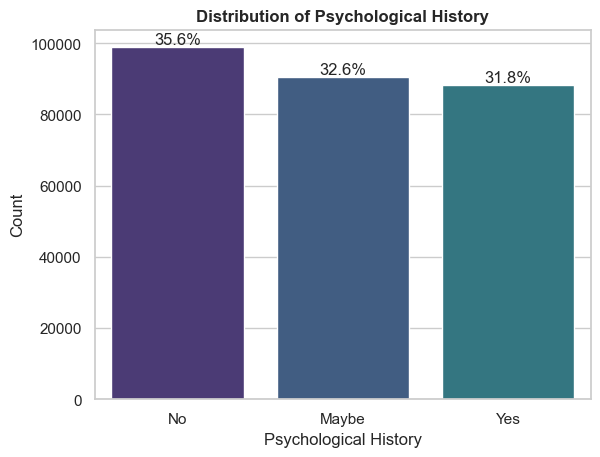

In [63]:
ax = sns.countplot(x='Psychological_History', data=train, order=psychological_count.index)

annotate_percentages(ax, train['Psychological_History'])
plt.title('Distribution of Psychological History')
plt.xlabel('Psychological History')
plt.ylabel('Count')
plt.show()

#### 12. Emotional Fluctuations

In [64]:
print(f"Null Count: {train['Emotional_Fluctuations'].isnull().sum()}")

Null Count: 0


In [65]:
emotional_fluctuations_count = train['Emotional_Fluctuations'].value_counts()
emotional_fluctuations_count

Emotional_Fluctuations
Medium    96007
Low       94765
High      86974
Name: count, dtype: int64

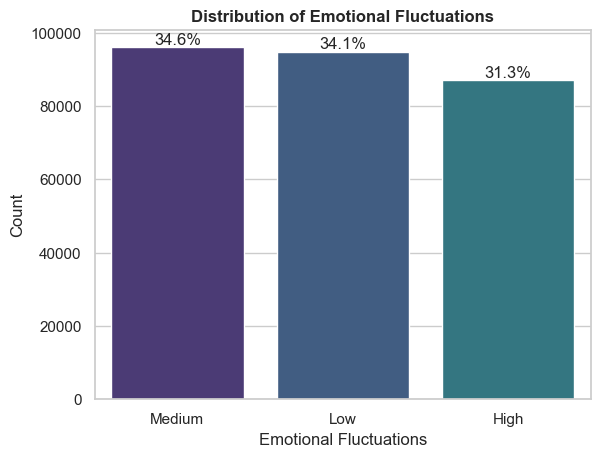

In [66]:
ax = sns.countplot(x='Emotional_Fluctuations', data=train, order=emotional_fluctuations_count.index)

annotate_percentages(ax, train['Emotional_Fluctuations'])
plt.title('Distribution of Emotional Fluctuations')
plt.xlabel('Emotional Fluctuations')
plt.ylabel('Count')
plt.show()

#### 13. Adaptation Challenges

In [67]:
print(f"Null Count: {train['Adaptation_Challenges'].isnull().sum()}")

Null Count: 1


In [68]:
most_frequent = train['Adaptation_Challenges'].mode()[0]

train['Adaptation_Challenges'].fillna(most_frequent, inplace=True)

In [69]:
print(f"Null Count: {train['Adaptation_Challenges'].isnull().sum()}")

Null Count: 0


In [70]:
replacement_dict = {'NO': 'No', 'no': 'No'}

train['Adaptation_Challenges'].replace(replacement_dict, inplace=True)

In [71]:
adaptation_count = train['Adaptation_Challenges'].value_counts()
adaptation_count

Adaptation_Challenges
No     146555
Yes    131191
Name: count, dtype: int64

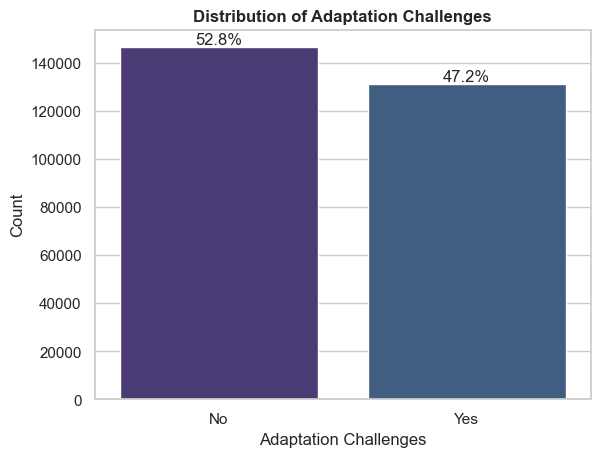

In [72]:
ax = sns.countplot(x='Adaptation_Challenges', data=train, order=adaptation_count.index)

annotate_percentages(ax, train['Adaptation_Challenges'])
plt.title('Distribution of Adaptation Challenges')
plt.xlabel('Adaptation Challenges')
plt.ylabel('Count')
plt.show()

#### 14. Job Engagement

In [73]:
print(f"Null Count: {train['Job_Engagement'].isnull().sum()}")

Null Count: 4


In [74]:
most_frequent = train['Job_Engagement'].mode()[0]

train['Job_Engagement'].fillna(most_frequent, inplace=True)

In [75]:
print(f"Null Count: {train['Job_Engagement'].isnull().sum()}")

Null Count: 0


In [76]:
replacement_dict = {'NILL': 'No', 'NO': 'No', 'N/a': 'No'}

train['Job_Engagement'].replace(replacement_dict, inplace=True)

In [77]:
job_engagement_count = train['Job_Engagement'].value_counts()
job_engagement_count

Job_Engagement
No       100529
Maybe     96136
Yes       81081
Name: count, dtype: int64

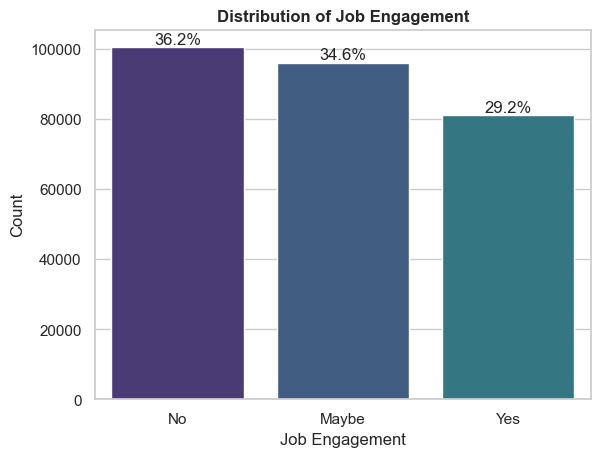

In [78]:
ax = sns.countplot(x='Job_Engagement', data=train, order=job_engagement_count.index)

annotate_percentages(ax, train['Job_Engagement'])
plt.title('Distribution of Job Engagement')
plt.xlabel('Job Engagement')
plt.ylabel('Count')
plt.show()

#### 15. Social Vulnerability

In [79]:
print(f"Null Count: {train['Social_Vulnerability'].isnull().sum()}")

Null Count: 0


In [80]:
social_vulnerability_count = train['Social_Vulnerability'].value_counts()
social_vulnerability_count

Social_Vulnerability
Maybe    98197
No       92450
Yes      87099
Name: count, dtype: int64

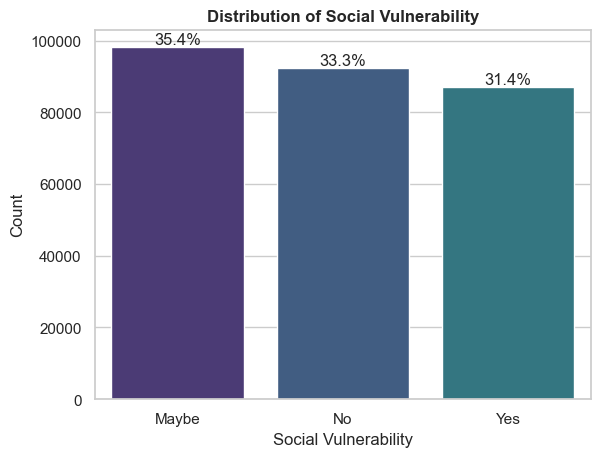

In [81]:
ax = sns.countplot(x='Social_Vulnerability', data=train, order=social_vulnerability_count.index)

annotate_percentages(ax, train['Social_Vulnerability'])
plt.title('Distribution of Social Vulnerability')
plt.xlabel('Social Vulnerability')
plt.ylabel('Count')
plt.show()

#### 16. Psych Evaluation 

In [82]:
print(f"Null Count: {train['Psych_Evaluation'].isnull().sum()}")

Null Count: 2


In [83]:
most_frequent = train['Psych_Evaluation'].mode()[0]

train['Psych_Evaluation'].fillna(most_frequent, inplace=True)

In [84]:
print(f"Null Count: {train['Psych_Evaluation'].isnull().sum()}")

Null Count: 0


In [85]:
replacement_dict = {'N/a': 'No'}

train['Psych_Evaluation'].replace(replacement_dict, inplace=True)

In [86]:
psych_evaluation_count = train['Psych_Evaluation'].value_counts()
psych_evaluation_count

Psych_Evaluation
No       220523
Maybe     49019
Yes        8204
Name: count, dtype: int64

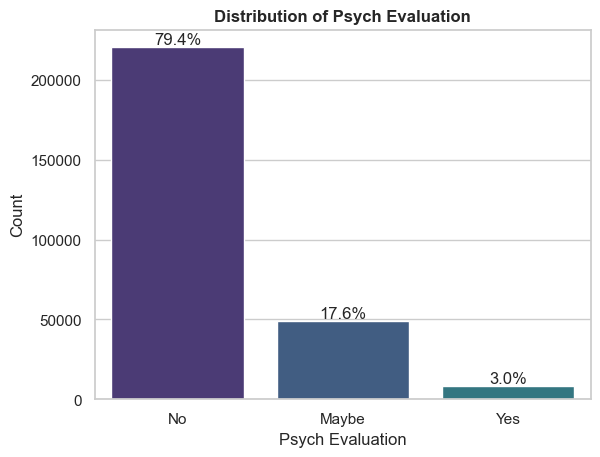

In [87]:
ax = sns.countplot(x='Psych_Evaluation', data=train, order=psych_evaluation_count.index)

annotate_percentages(ax, train['Psych_Evaluation'])
plt.title('Distribution of Psych Evaluation')
plt.xlabel('Psych Evaluation')
plt.ylabel('Count')
plt.show()

#### 17. Support Options 

In [88]:
print(f"Null Count: {train['Support_Options'].isnull().sum()}")

Null Count: 4


In [89]:
most_frequent = train['Support_Options'].mode()[0]

train['Support_Options'].fillna(most_frequent, inplace=True)

In [90]:
print(f"Null Count: {train['Support_Options'].isnull().sum()}")

Null Count: 0


In [91]:
replacement_dict = {'N/a': 'No', 'NO': 'No'}

train['Support_Options'].replace(replacement_dict, inplace=True)

In [92]:
support_count = train['Support_Options'].value_counts()
support_count

Support_Options
No          112987
Yes          90912
Not sure     73847
Name: count, dtype: int64

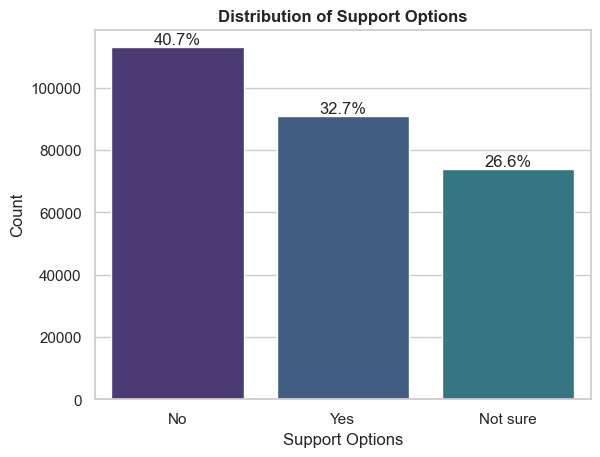

In [93]:
ax = sns.countplot(x='Support_Options', data=train, order=support_count.index)

annotate_percentages(ax, train['Support_Options'])
plt.title('Distribution of Support Options')
plt.xlabel('Support Options')
plt.ylabel('Count')
plt.show()

#### 18. Body Weight

In [94]:
train['Body_Weight'].head()

0    59.0
1    58.0
2    70.0
3    72.0
4    94.0
Name: Body_Weight, dtype: float64

In [95]:
print(f"Null Count: {train['Body_Weight'].isnull().sum()}")

Null Count: 1


In [96]:
mean_body_weight = train['Body_Weight'].mean()

train['Body_Weight'].fillna(mean_body_weight, inplace=True)

In [97]:
print(f"Null Count: {train['Body_Weight'].isnull().sum()}")

Null Count: 0


In [98]:
skewness = train['Body_Weight'].skew()
print('Skewness:', skewness)

Skewness: 0.004352622003602395


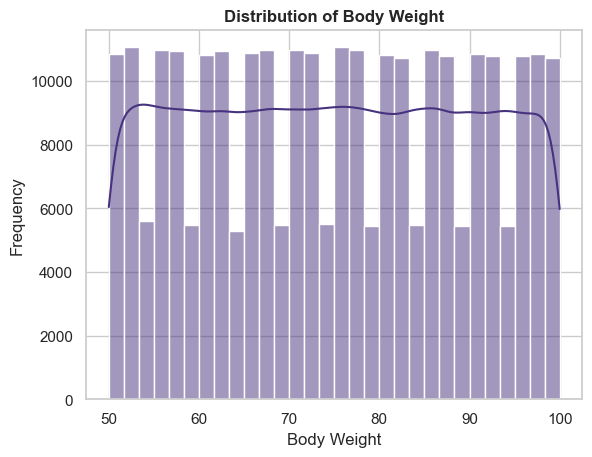

In [99]:
sns.histplot(train['Body_Weight'], kde=True, bins=30)

plt.title('Distribution of Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Frequency')
plt.show()

## Exploratory Data Analysis

#### Relationship between Job Type and Emotional Fluctuations

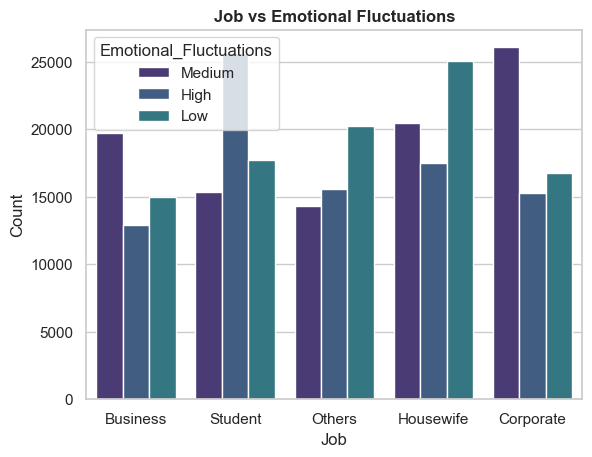

In [100]:
sns.countplot(x='Job', hue='Emotional_Fluctuations', data=train)
plt.title('Job vs Emotional Fluctuations')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

#### Distribution of Body Weight by Sex

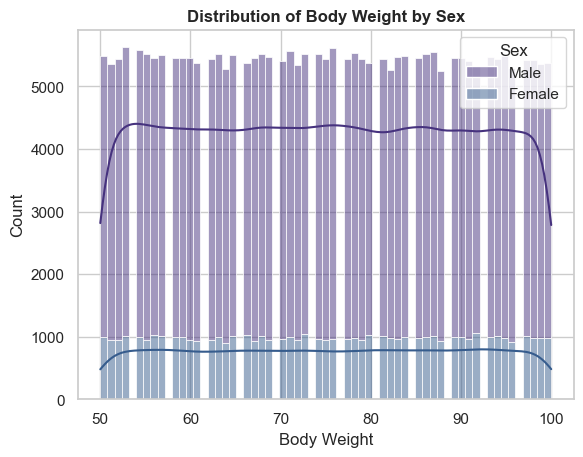

In [101]:
sns.histplot(data=train, x='Body_Weight', hue='Sex', multiple='stack', kde=True)
plt.title('Distribution of Body Weight by Sex')
plt.xlabel('Body Weight')
plt.ylabel('Count')
plt.show()

#### Relationship between Indoor Days and Increasing Stress

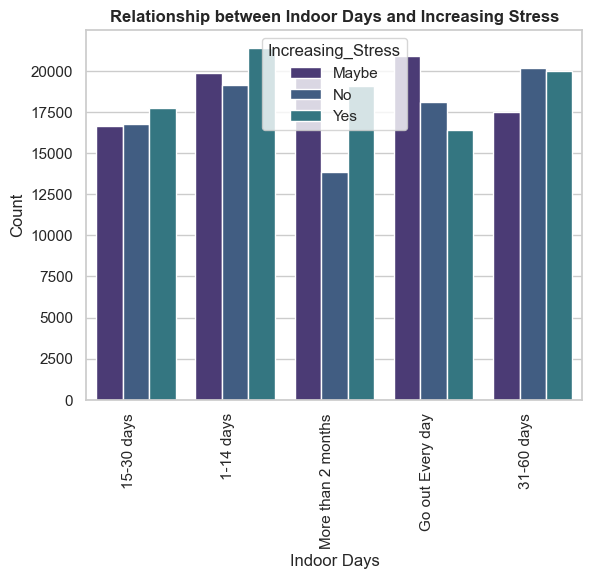

In [102]:
sns.countplot(data=train, x='Indoor_Days', hue='Increasing_Stress')
plt.title('Relationship between Indoor Days and Increasing Stress')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Indoor Days')
plt.ylabel('Count')
plt.show()

#### Psychological Evaluation by Nation

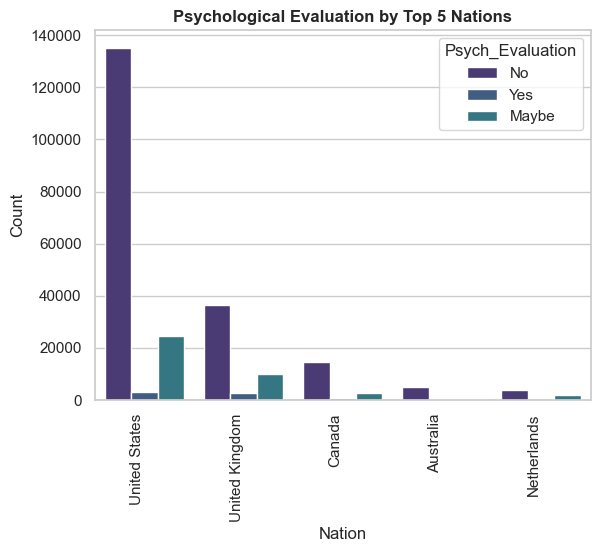

In [103]:
top_5_nations = train['Nation'].value_counts().nlargest(5).index
df_top_5 = train[train['Nation'].isin(top_5_nations)]

sns.countplot(data=df_top_5, x='Nation', hue='Psych_Evaluation')
plt.title('Psychological Evaluation by Top 5 Nations')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Nation')
plt.ylabel('Count')
plt.show()

#### Distribution of Body Weight by Nation

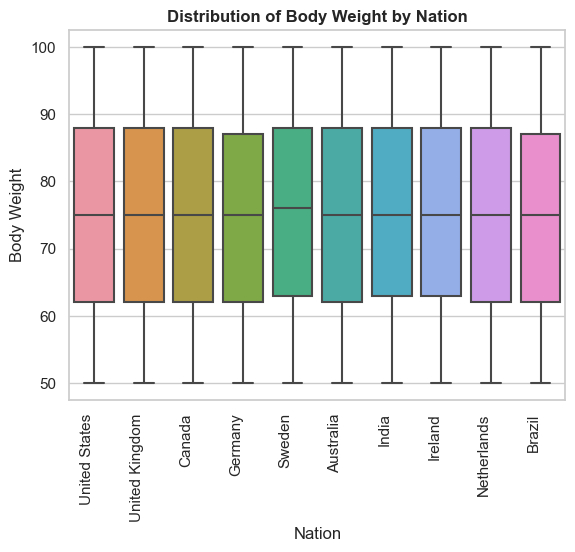

In [104]:
top_10_nations = train['Nation'].value_counts().nlargest(10).index
df_top_10 = train[train['Nation'].isin(top_10_nations)]

sns.boxplot(data=df_top_10, x='Nation', y='Body_Weight')
plt.title('Distribution of Body Weight by Nation')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Nation')
plt.ylabel('Body Weight')
plt.show()

#### Freelance Status by Job Type

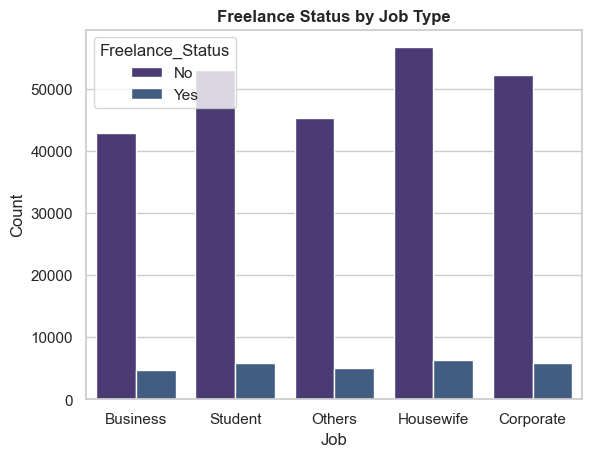

In [105]:
sns.countplot(data=train, x='Job', hue='Freelance_Status')
plt.title('Freelance Status by Job Type')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

#### Relationship between Genetic Background and Therapy

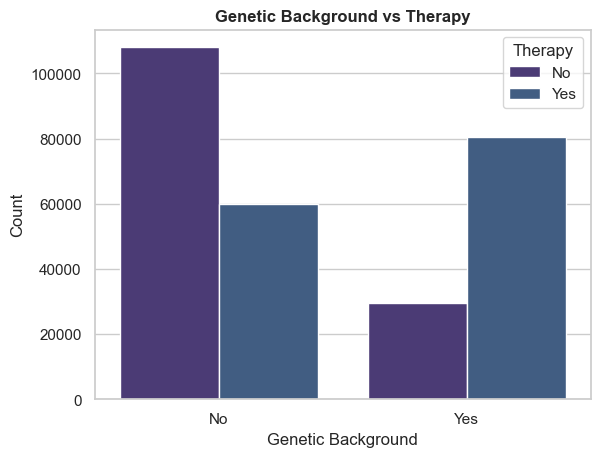

In [106]:
sns.countplot(data=train, x='Genetic_Background', hue='Therapy')
plt.title('Genetic Background vs Therapy')
plt.xlabel('Genetic Background')
plt.ylabel('Count')
plt.show()

#### Social Vulnerability by Adaptation Challenges

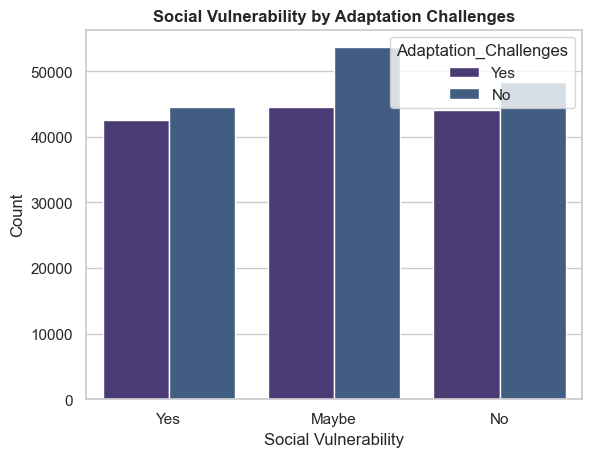

In [107]:
sns.countplot(data=train, x='Social_Vulnerability', hue='Adaptation_Challenges')
plt.title('Social Vulnerability by Adaptation Challenges')
plt.xlabel('Social Vulnerability')
plt.ylabel('Count')
plt.show()

#### Relationship between Support Options and Psych Evaluation

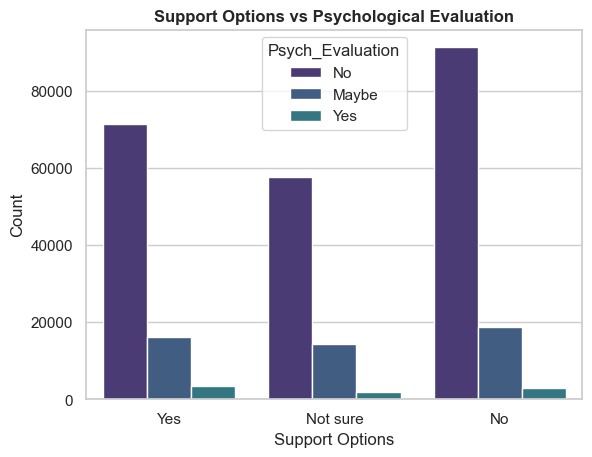

In [108]:
sns.countplot(data=train, x='Support_Options', hue='Psych_Evaluation')
plt.title('Support Options vs Psychological Evaluation')
plt.xlabel('Support Options')
plt.ylabel('Count')
plt.show()

#### Relationship between Job Engagement and Habit Changes

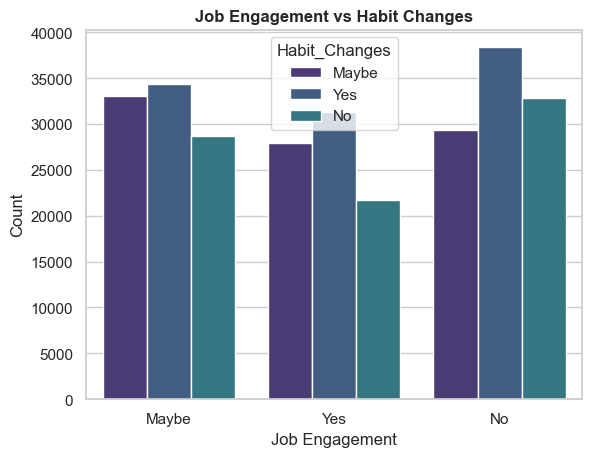

In [109]:
sns.countplot(data=train, x='Job_Engagement', hue='Habit_Changes')
plt.title('Job Engagement vs Habit Changes')
plt.xlabel('Job Engagement')
plt.ylabel('Count')
plt.show()

#### Relationship between Job Engagement and Habit Changes

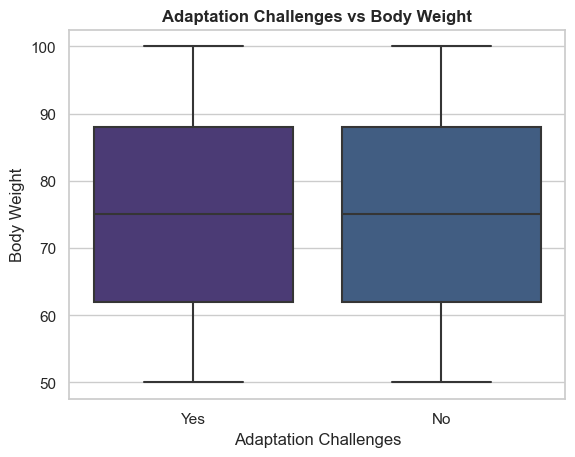

In [110]:
sns.boxplot(data=train, x='Adaptation_Challenges', y='Body_Weight')
plt.title('Adaptation Challenges vs Body Weight')
plt.xlabel('Adaptation Challenges')
plt.ylabel('Body Weight')
plt.show()

## Machine Learning

In [111]:
import os, pickle
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [112]:
label_mapping = {'High': 2, 'Medium': 1, 'Low': 0}

train['Emotional_Fluctuations'] = train['Emotional_Fluctuations'].map(label_mapping)

In [113]:
X = train.drop(columns=['Emotional_Fluctuations'])
y = train['Emotional_Fluctuations']

In [114]:
X.head()

,Sex,Nation,Job,Freelance_Status,Genetic_Background,Therapy,Indoor_Days,Increasing_Stress,Habit_Changes,Psychological_History,Adaptation_Challenges,Job_Engagement,Social_Vulnerability,Psych_Evaluation,Support_Options,Body_Weight
0,Male,United States,Business,No,No,No,15-30 days,Maybe,Maybe,No,Yes,Maybe,Yes,No,Yes,59.0
1,Male,United States,Student,Yes,Yes,Yes,1-14 days,Maybe,Yes,No,No,Yes,Maybe,No,Not sure,58.0
2,Male,United States,Others,No,No,Yes,More than 2 months,No,No,No,No,Yes,No,No,Yes,70.0
3,Male,United States,Housewife,No,No,Yes,15-30 days,Maybe,No,No,Yes,Maybe,Yes,No,No,72.0
4,Male,United States,Housewife,No,No,Yes,Go out Every day,Yes,Yes,No,Yes,No,No,No,Yes,94.0


In [115]:
y.head()

0    1
1    2
2    2
3    0
4    0
Name: Emotional_Fluctuations, dtype: int64

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=34)

In [117]:
print(f"Shape X-train: {X_train.shape}")
print(f"Shape X-test : {X_test.shape}")

Shape X-train: (222196, 16)
Shape X-test : (55550, 16)


In [118]:
def pipeline_processing(model, X_train, X_test, y_train, y_test):
    """
    A function that creates and fits a machine learning pipeline, makes predictions, 
    and prints evaluation metrics.
    """
    col_tranformer = ColumnTransformer(
        transformers=[
            ('col_tranformer', OneHotEncoder(sparse_output=False, drop='first'), [i for i in range(15)])
        ], remainder='passthrough'
    )
    
    pipe = Pipeline(
        [
            ('transformation', col_tranformer),
            ('model', model)
        ]
    )

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}") 
    return pipe

In [119]:
def save_results_csv(result, model_name):
    emotional_fluctuations = {
        0: 'Low', 
        1: 'Medium', 
        2: 'High'
    }
    path = './Results CSV/'
    os.makedirs(path, exist_ok=True)
    
    ids = [i+1 for i in range(len(result))]
    predicted_labels = [emotional_fluctuations[val] for val in result]

    df = pd.DataFrame(
        {
            'ID': ids, 
            'Emotional_Fluctuations': predicted_labels
        }
    )

    file_path = os.path.join(path, f'{model_name}_results.csv')
    df.to_csv(f'{path+model_name}_results.csv', index=False)
    print(f'Saved results to {file_path}')

#### Random Forest

In [120]:
def get_best_parameters(X_train, y_train):
    """
    Grid search to find the best hyperparameters for a Random Forest Regressor
    """
    random_forest = RandomForestClassifier()

    rf_pipe = Pipeline([
        ('col_transformer', ColumnTransformer(
            transformers=[
                ('col_transformer', OneHotEncoder(sparse_output=False, drop='first'), [i for i in range(15)])
            ], remainder='passthrough')
        ),
        ('model', random_forest)
    ])
    
    params = {
        'model__n_estimators': [20, 120, 160],
        'model__random_state': [0, 42],
        'model__max_depth': [15, 20, None],
        'model__max_samples': [0.5, 0.75, 1.0],
        'model__max_features': [0.2, 0.6, 1.0],
    }
    
    rf_grid = GridSearchCV(
        estimator=rf_pipe,
        param_grid=params,
        cv=5,
        verbose=2,
        n_jobs=-1
    )

    rf_grid.fit(X_train, y_train)
    best_score = rf_grid.best_score_
    best_params = rf_grid.best_params_

    return best_score, best_params

In [121]:
# best_params = get_best_parameters(X_train, y_train)
# best_params

In [122]:
random_forest = RandomForestClassifier(
    max_depth=15,
    max_features=0.6,
    n_estimators=20,
    random_state=42,
)

In [123]:
random_forest_pipeline = pipeline_processing(random_forest, X_train, X_test, y_train, y_test)
random_forest_pipeline

Accuracy Score: 0.9781638163816382


Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tranformer',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14])])),
                ('model',
                 RandomForestClassifier(max_depth=15, max_features=0.6,
                                        n_estimators=20, random_state=42))])

In [124]:
pred = random_forest_pipeline.predict(test)

save_results_csv(pred, 'random_forest')

Saved results to ./Results CSV/random_forest_results.csv


In [125]:
pickle.dump(random_forest_pipeline, open('./Models/random_forest_model.pkl', 'wb'))

#### Gradient Boost

In [126]:
gradient_boost = GradientBoostingClassifier(n_estimators=120)

In [127]:
gradient_boost_pipeline = pipeline_processing(gradient_boost, X_train, X_test, y_train, y_test)
gradient_boost_pipeline

Accuracy Score: 0.6892889288928893


Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tranformer',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14])])),
                ('model', GradientBoostingClassifier(n_estimators=120))])

In [128]:
pred = gradient_boost_pipeline.predict(test)

save_results_csv(pred, 'gradient_boost')

Saved results to ./Results CSV/gradient_boost_results.csv


In [129]:
pickle.dump(gradient_boost_pipeline, open('./Models/gradient_boost_model.pkl', 'wb'))

#### XgBoost

In [130]:
xgboost = XGBClassifier(n_estimators=45, max_depth=5, learning_rate=0.5)

In [132]:
xgboost_pipeline = pipeline_processing(xgboost, X_train, X_test, y_train, y_test)
xgboost_pipeline

Accuracy Score: 0.9665346534653465


Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tranformer',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_s...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=45, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [133]:
pred = xgboost_pipeline.predict(test)

save_results_csv(pred, 'xgboost')

Saved results to ./Results CSV/xgboost_results.csv


In [134]:
pickle.dump(xgboost_pipeline, open('./Models/xgboost_model.pkl', 'wb'))

#### Voting Classifier

In [135]:
voting = VotingClassifier(
    [
        ('random_forest', random_forest),
        ('gradient_boost', gradient_boost), 
        ('xgboost', xgboost),
    ], weights=[5, 1, 2]
)

In [136]:
voting_pipeline = pipeline_processing(voting, X_train, X_test, y_train, y_test)
voting_pipeline

Accuracy Score: 0.9781638163816382


Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tranformer',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14])])),
                ('model',
                 VotingClassifier(estimators=[('random_forest',
                                               RandomForestClassifier(max_depth=15,
                                                                      max_features=0.6,
                                                                      n_estimators=20,
                                                                      random_state=42)),
                                              ('gradient_...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=5,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=45,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             objective='multi:softprob', ...))],
                                  weights=[5, 1, 2]))])

In [137]:
pred = voting_pipeline.predict(test)

save_results_csv(pred, 'voting')

Saved results to ./Results CSV/voting_results.csv


In [138]:
pickle.dump(voting_pipeline, open('./Models/voting_model.pkl', 'wb'))